In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import random
def generate_population(size, x_bound, y_bound):
    x_lower_bound, x_upper_bound = x_bound
    y_lower_bound, y_upper_bound = y_bound

    population = []
    for i in range(size):
        individual = {
            "x": random.uniform(x_lower_bound, x_upper_bound),
            "y": random.uniform(y_lower_bound, y_upper_bound),
        }
        population.append(individual)
    return population


In [ ]:
import math
def apply_function(individual):
    x = individual["x"]
    y = individual["y"]
    return (x ** 2 + y**2)

In [ ]:
def choice_by_roulette(population_sort, add_fitness):
    offset = 0
    add_fitness_norm = add_fitness
    lowest_fitness = apply_function(population_sort[0])
    if lowest_fitness < 0:
        offset = -lowest_fitness
        add_fitness_norm += offset * len(population_sort)

    draw = random.uniform(0, 1)

    accumulated = 0
    for individual in population_sort:
        fitness = apply_function(individual) + offset
        probability = fitness / add_fitness_norm
        accumulated += probability

        if draw <= accumulated:
            return individual

In [ ]:
def sort_population_by_fitness(population):
    return sorted(population, key=apply_function)


def crossover(individual_a, individual_b):
    xa = individual_a["x"]
    ya = individual_a["y"]
    xb = individual_b["x"]
    yb = individual_b["y"]
    return {"x": (xa + xb) / 2, "y": (ya + yb) / 2}

def mutate(individual):
    next_x = individual["x"] + random.uniform(-0.05, 0.05)
    next_y = individual["y"] + random.uniform(-0.05, 0.05)

    lower_bound, upper_bound = (-5, 5)

    # Guarantee we keep inside boundaries
    next_x = min(max(next_x, lower_bound), upper_bound)
    next_y = min(max(next_y, lower_bound), upper_bound)

    return {"x": next_x, "y": next_y}


def make_next_generation(previous_population):
    next_generation = []
    sorted_by_fitness_population = sort_population_by_fitness(previous_population)
    population_size = len(previous_population)
    add_fitness = sum(apply_function(individual) for individual in population)

    for i in range(population_size):
        first_choice = choice_by_roulette(sorted_by_fitness_population, add_fitness)
        second_choice = choice_by_roulette(sorted_by_fitness_population, add_fitness)

        individual = crossover(first_choice, second_choice)
        individual = mutate(individual)
        next_generation.append(individual)

    return next_generation

In [ ]:
def plot(x_bounds, y_bounds, mins, figsize=(20, 12)):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection="3d")

    x = np.linspace(*x_bounds, 100)
    y = np.linspace(*y_bounds, 100)
    x, y = np.meshgrid(x, y)
    z = x**2 + y**2

    x1 = np.array([data['x'] for data in mins])
    y1 = np.array([data['y'] for data in mins])
    z1 = x1**2 + y1**2

    c1=ax.plot_surface(x, y, z, alpha=0.5, cmap="viridis", label ='Actual')
    c1._facecolors2d=c1._facecolors3d
    c1._edgecolors2d=c1._edgecolors3d
    c2=ax.scatter3D(x1, y1, z1, color="red", label = 'Genetic Approach')
    c2._facecolors2d=c2._facecolors3d
    c2._edgecolors2d=c2._edgecolors3d
    ax.legend()


In [ ]:
x_bound=[-5,5]
y_bound=[-5,5]
generations =100
population = generate_population(10, x_bound, y_bound)
mins = []
population = generate_population(size=10, x_bound=[-5,5], y_bound=[-5,5])
population = make_next_generation(population)
best_individual = sort_population_by_fitness(population)[-1]
print("\n🔬 FINAL RESULT")
print(best_individual, apply_function(best_individual))
for i in range(generations):
    print(f"generation {i}")
    population = make_next_generation(population)

    costs = np.array([apply_function(individual) for individual in population])
    best_idx = np.argmin(costs)
    mins.append(population[best_idx])
    
    for individual in population:
        print(individual, apply_function(individual))

print(f"\nbest: {population[best_idx]}: {costs[best_idx]}")


🔬 FINAL RESULT
{'x': 3.5069834831896265, 'y': 3.2793252108486337} 23.052906989872284
generation 0
{'x': 3.5698412426659334, 'y': 2.6356757274568867} 19.690553038144046
{'x': 3.5346006634416858, 'y': 2.966679675852398} 21.294590149118093
{'x': 0.6113346454963619, 'y': 0.3445064971671057} 0.49241477537451145
{'x': 3.5933505203756786, 'y': 3.0028989316998613} 21.92956995628833
{'x': 2.9444664626680166, 'y': 2.9947925467708507} 17.63866514797094
{'x': 2.8600485840822456, 'y': 3.2908023724372986} 19.009258157749812
{'x': -0.04662221042533128, 'y': 0.31936750781086404} 0.10416923555026618
{'x': 2.8715744617010874, 'y': 3.343564163765864} 19.425361206313212
{'x': 0.628251399434217, 'y': -0.0412293710000949} 0.39639968192411557
{'x': 0.6698826915433416, 'y': -0.316428358933906} 0.5488697267669566
generation 1
{'x': 3.1983125902847003, 'y': 2.996834838489085} 19.210222474355533
{'x': 3.249802328971693, 'y': 2.9963686194960815} 19.539440081290692
{'x': 3.1974573983001684, 'y': 3.024320282423164

AttributeError: ignored

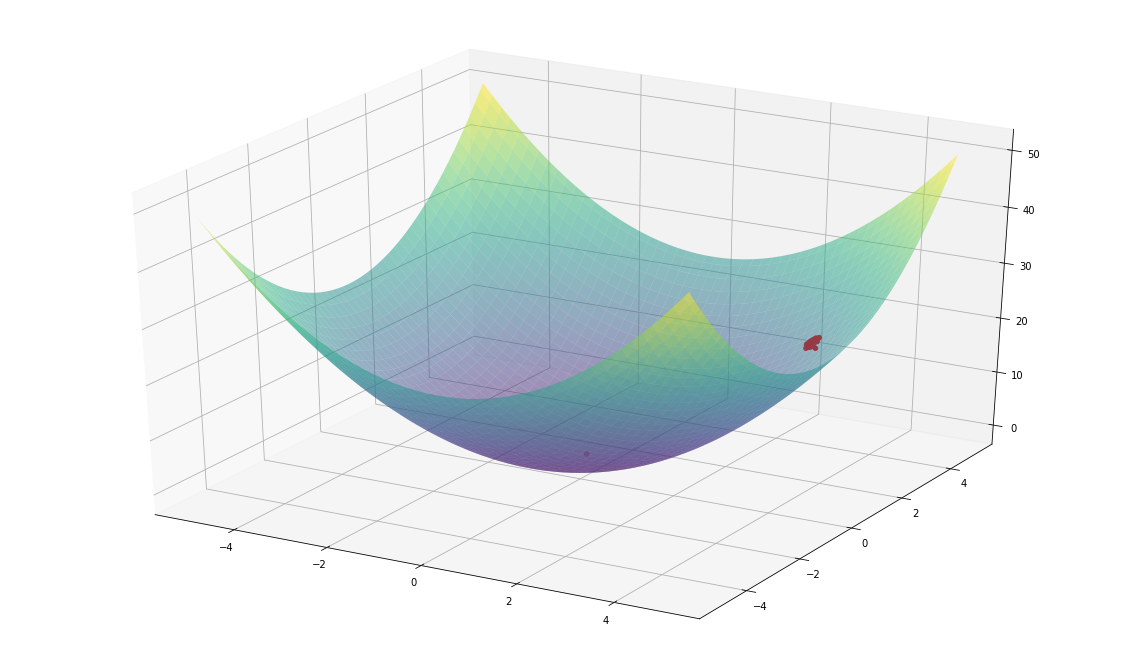

In [ ]:
plot(x_bound, y_bound, mins)